In [2]:
from zipfile import zipfile

In [5]:
import zipfile
with zipfile.ZipFile('C:\Ghibli AI generated\data.zip', 'r') as z:
    z.extractall('data_folder')


In [6]:
import zipfile

# Path to your zip file
zip_path = "C:\Ghibli AI generated\data.zip"

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files inside the ZIP
    print("Files inside the ZIP:")
    print(zip_ref.namelist())


Files inside the ZIP:
['captions_large.csv', 'images/img_000.jpg', 'images/img_001.jpg', 'images/img_002.jpg', 'images/img_003.jpg', 'images/img_004.jpg', 'images/img_005.jpg', 'images/img_006.jpg', 'images/img_007.jpg', 'images/img_008.jpg', 'images/img_009.jpg', 'images/img_010.jpg', 'images/img_011.jpg', 'images/img_012.jpg', 'images/img_013.jpg', 'images/img_015.jpg', 'images/img_016.jpg', 'images/img_017.jpg', 'images/img_018.jpg', 'images/img_019.jpg', 'images/img_020.jpg', 'images/img_021.jpg', 'images/img_022.jpg', 'images/img_023.jpg', 'images/img_024.jpg', 'images/img_025.jpg', 'images/img_026.jpg', 'images/img_027.jpg', 'images/img_028.jpg', 'images/img_029.jpg', 'images/img_030.jpg', 'images/img_031.jpg', 'images/img_032.jpg', 'images/img_033.jpg', 'images/img_034.jpg', 'images/img_035.jpg', 'images/img_036.jpg', 'images/img_037.jpg', 'images/img_038.jpg', 'images/img_039.jpg', 'images/img_040.jpg', 'images/img_041.jpg', 'images/img_043.jpg', 'images/img_044.jpg', 'images/i

In [9]:
import zipfile

zip_path = r"C:\Ghibli AI generated\data.zip"
extract_to = r"C:\Ghibli AI generated\unzipped_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ All files extracted to:", extract_to)


✅ All files extracted to: C:\Ghibli AI generated\unzipped_data


In [11]:
import zipfile

zip_path = r"C:\Ghibli AI generated\data.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open('captions_large.csv') as file:
        content = file.read().decode('utf-8')
        print(content[:300])  # show first 300 characters


image,caption
"{'bytes': None, 'path': '/kaggle/working/output/images/img_000.jpg'}","The image is an animated scene from a movie. The background of the image is a brick wall. There is a window on the right side of the image, and a light fixture on the left side of the image. The window on the right


In [13]:
import pandas as pd

df = pd.read_csv(r"C:\Ghibli AI generated\unzipped_data\captions_large.csv")
print(df.head())


                                               image  \
0  {'bytes': None, 'path': '/kaggle/working/outpu...   
1  {'bytes': None, 'path': '/kaggle/working/outpu...   
2  {'bytes': None, 'path': '/kaggle/working/outpu...   
3  {'bytes': None, 'path': '/kaggle/working/outpu...   
4  {'bytes': None, 'path': '/kaggle/working/outpu...   

                                             caption  
0  The image is an animated scene from a movie. T...  
1  The image depicts a young boy, likely a charac...  
2  The image depicts a scene from an anime or man...  
3  The image is a poster for a movie titled "The ...  
4  The image depicts a young woman in an ornate, ...  


In [14]:
print(df.shape) 

(973, 2)


In [15]:
print(df.columns)    # See column names


Index(['image', 'caption'], dtype='object')


In [16]:
print(df.info())     # Check data types & missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    973 non-null    object
 1   caption  973 non-null    object
dtypes: object(2)
memory usage: 15.3+ KB
None


In [17]:
print(df.isnull().sum())  # Count missing values per column

image      0
caption    0
dtype: int64


In [18]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [20]:
# Drop rows with missing captions or images
df.dropna(subset=['caption', 'image'], inplace=True)

print("✅ Cleaned dataset shape:", df.shape)

✅ Cleaned dataset shape: (973, 2)


In [27]:
print(df['image'][0])


{'bytes': None, 'path': '/kaggle/working/output/images/img_000.jpg'}


In [28]:
import ast  # to safely evaluate string dictionary

# Convert the string to a dictionary and extract 'path'
df['image_path'] = df['image'].apply(lambda x: ast.literal_eval(x)['path'])

In [29]:
print(df['image_path'][0])


/kaggle/working/output/images/img_000.jpg


In [30]:
import os

df['local_image_path'] = df['image_path'].apply(
    lambda p: os.path.join(r"C:\Ghibli AI generated\unzipped_data\images", os.path.basename(p))
)


In [31]:
print(df['local_image_path'][0])


C:\Ghibli AI generated\unzipped_data\images\img_000.jpg


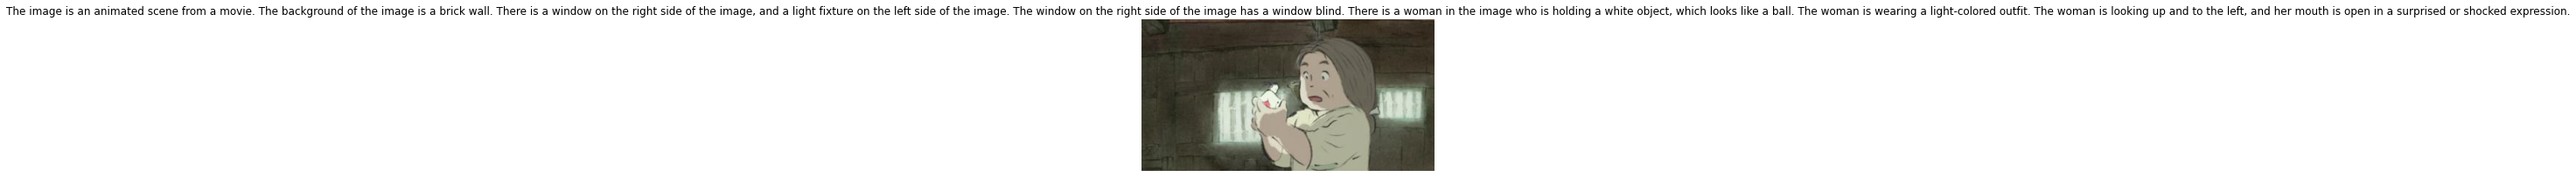

In [32]:
img_path = df['local_image_path'][0]

img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.title(df['caption'][0])
plt.show()


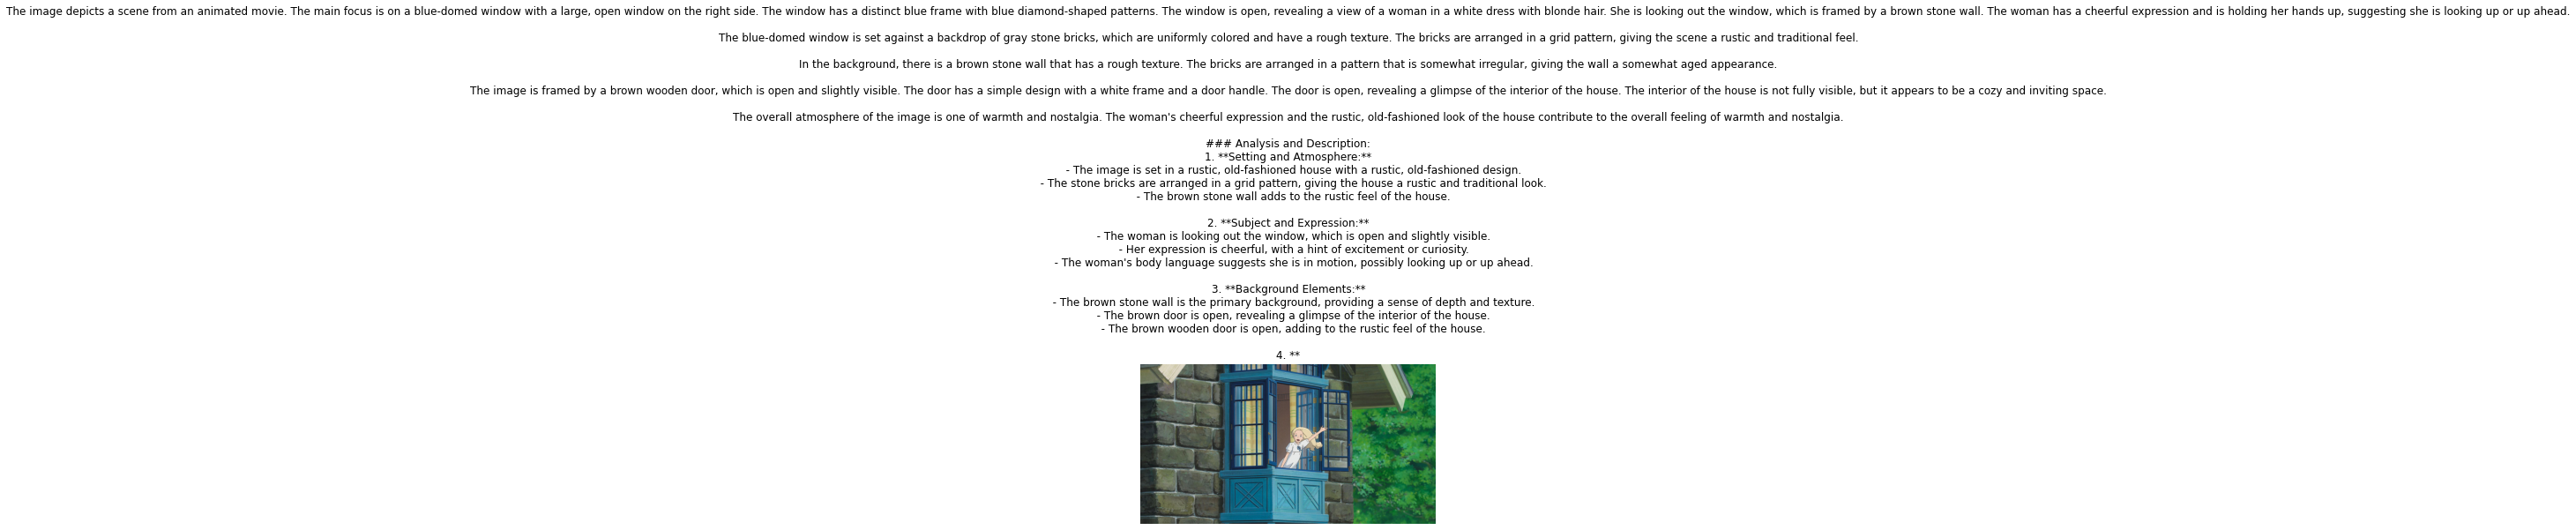

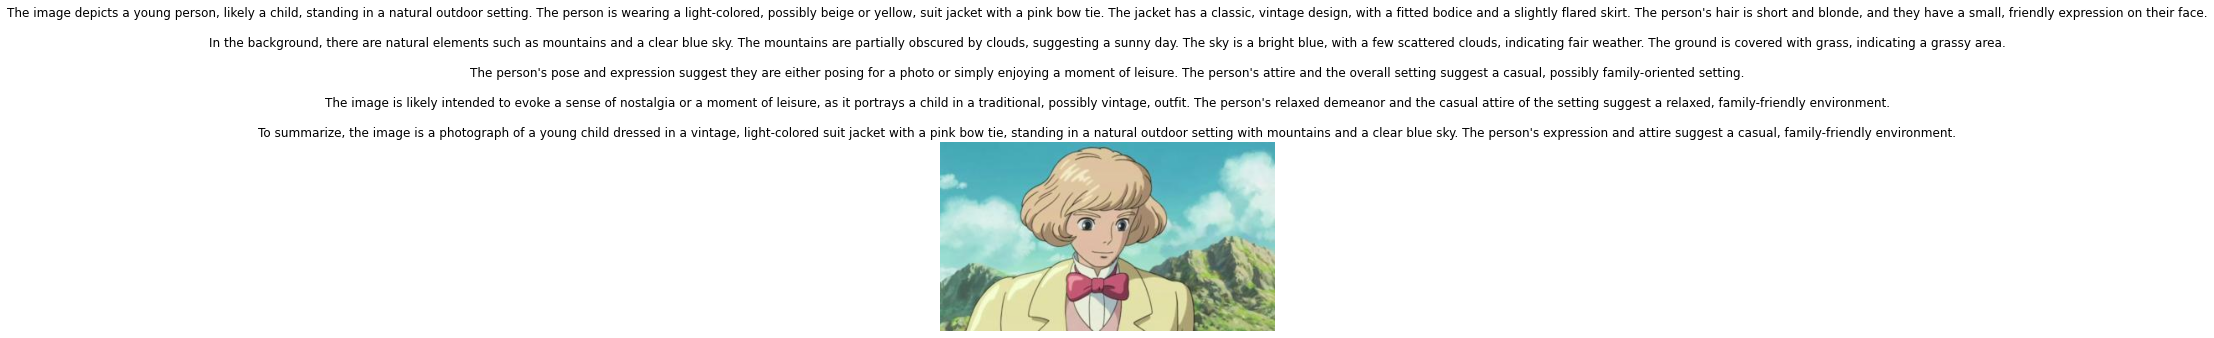

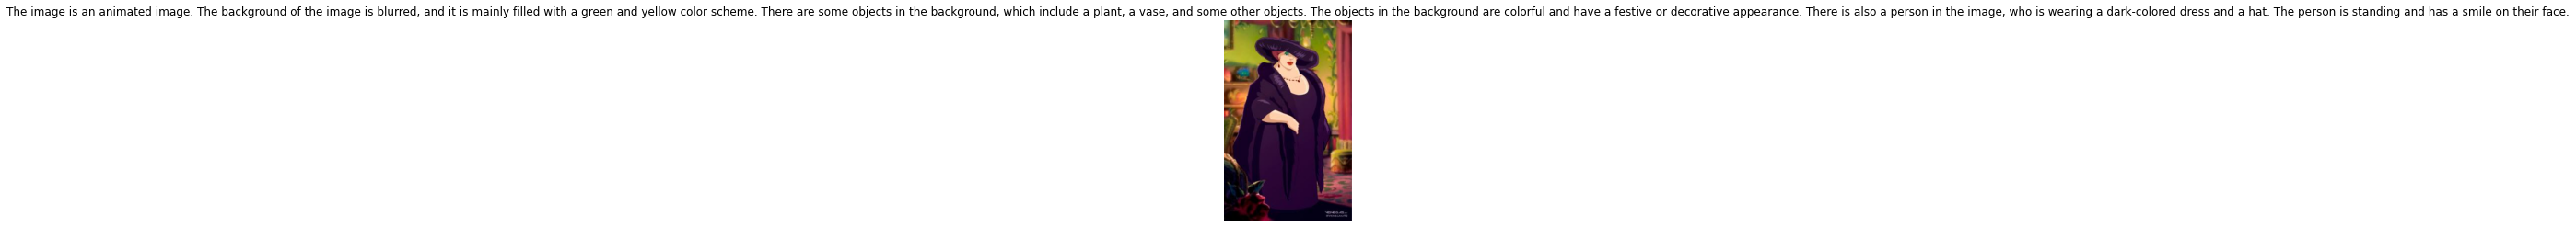

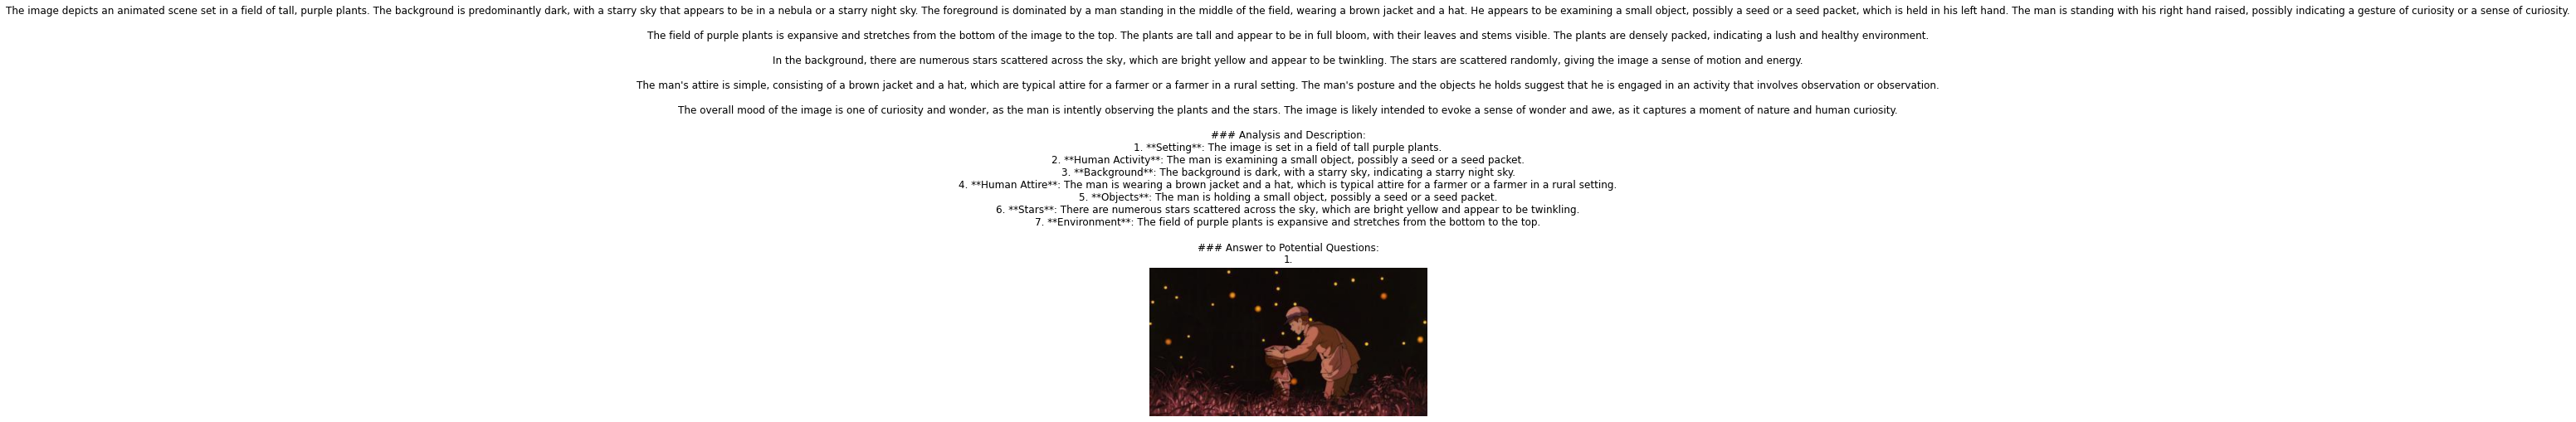

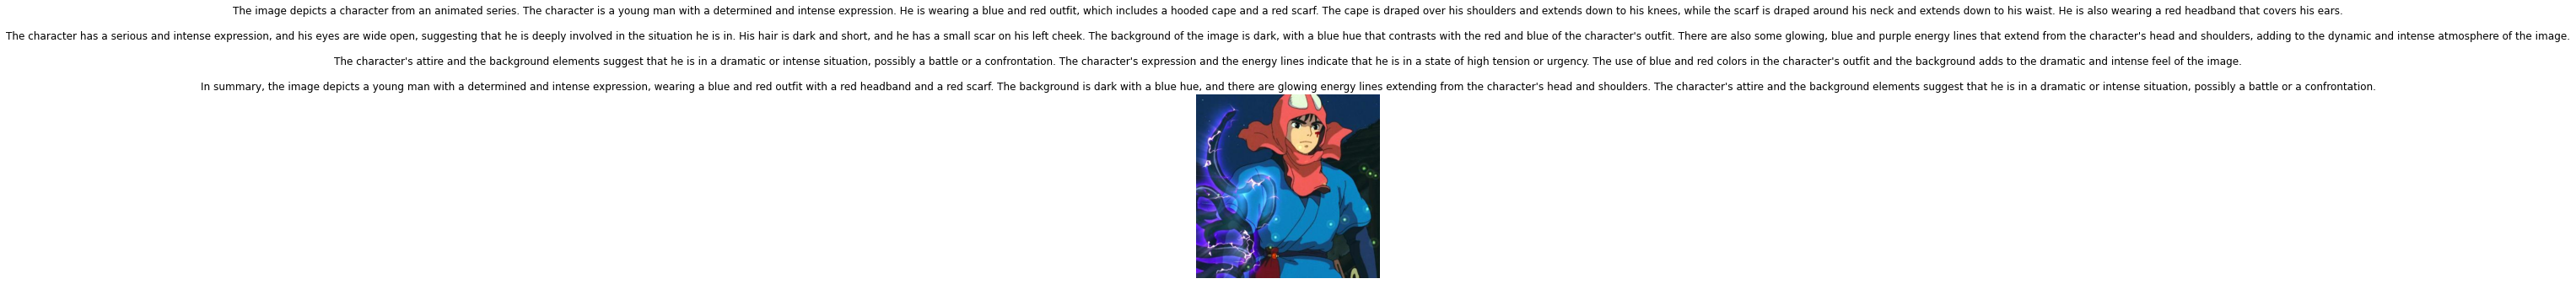

In [33]:
import random
from PIL import Image
import matplotlib.pyplot as plt

# Show 5 random images with captions
for i in random.sample(range(len(df)), 5):
    img = Image.open(df['local_image_path'][i])
    plt.imshow(img)
    plt.axis("off")
    plt.title(df['caption'][i])
    plt.show()


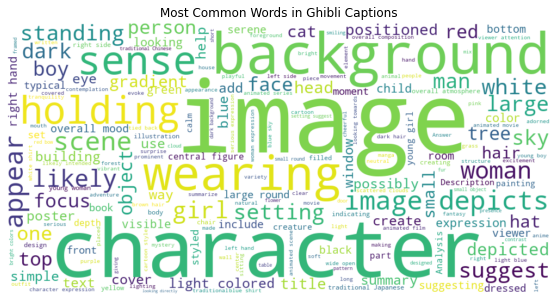

In [34]:
from wordcloud import WordCloud

text = " ".join(df['caption'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Ghibli Captions")
plt.show()


In [35]:
import diffusers
print("Diffusers installed successfully!")


ModuleNotFoundError: No module named 'diffusers'

In [37]:
import sys
print(sys.executable)


C:\Users\Administrator\Contacts\anaconda\python.exe
  Using cached diffusers-0.35.2-py3-none-any.whl.metadata (20 kB)
  Using cached accelerate-1.10.1-py3-none-any.whl.metadata (19 kB)
  Using cached huggingface_hub-0.35.3-py3-none-any.whl.metadata (14 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
Using cached diffusers-0.35.2-py3-none-any.whl (4.1 MB)
   ---------------------------------------- 241.2/241.2 MB 5.8 MB/s eta 0:00:00
Using cached accelerate-1.10.1-py3-none-any.whl (374 kB)
Using cached huggingface_hub-0.35.3-py3-none-any.whl (564 kB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.10.1
    Uninstalling sympy-1.10.1:
      Successfully uninstalled sympy-1.10.1
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.0
    Uninstalling huggingface-hub-0.24.0:
      Successfully uninstalled huggingface-hub-0.24.0



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
